<a href="https://colab.research.google.com/github/RomaZhm/ColabNotes/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle import

In [204]:
!pip install kaggle

In [205]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [206]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


# data

In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [547]:
basepath = "/content/"
train_data = pd.read_csv(basepath + "train.csv")
test_data = pd.read_csv(basepath + "test.csv")
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


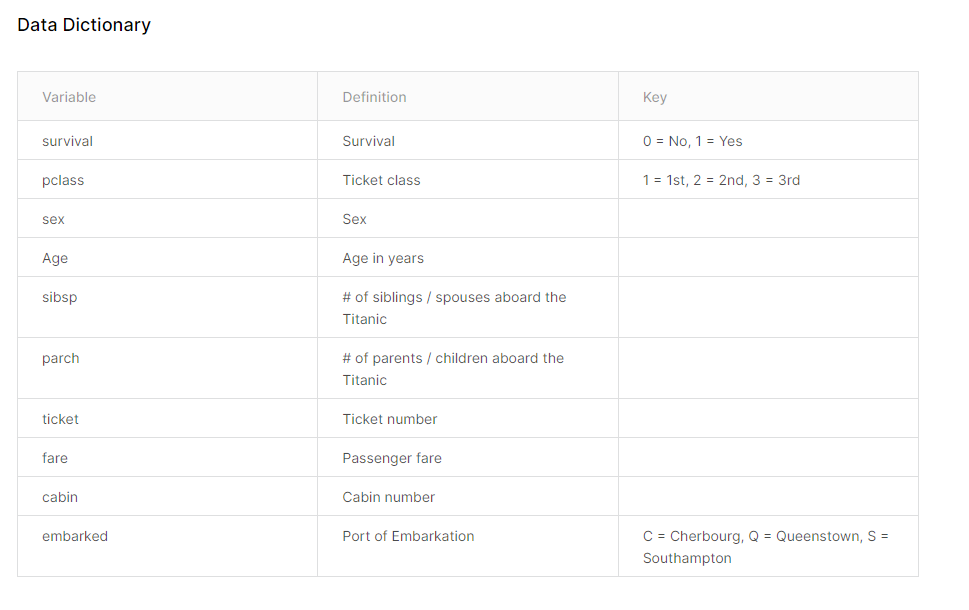

In [548]:
test_data.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [549]:
print(train_data.shape)
print(np.sum(train_data.isnull()), '\n')
print(np.sum(train_data[train_data['Survived'] == 0]['Age'].isnull()))
print(np.sum(train_data[train_data['Survived'] == 1]['Age'].isnull()))

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

125
52


In [550]:
women = train_data[train_data['Sex'] == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data[train_data['Sex'] == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of women who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of women who survived: 0.18890814558058924


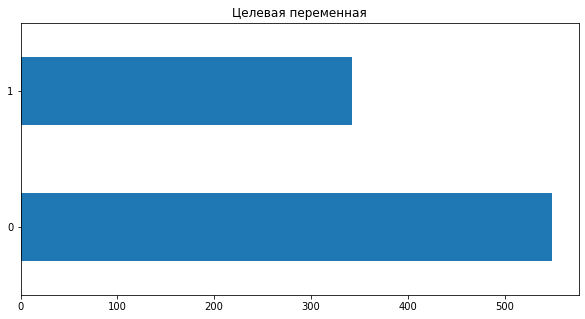

In [551]:
plt.figure(figsize=(10,5))

train_data['Survived'].value_counts().plot(kind='barh')

plt.title('Целевая переменная')
plt.show()

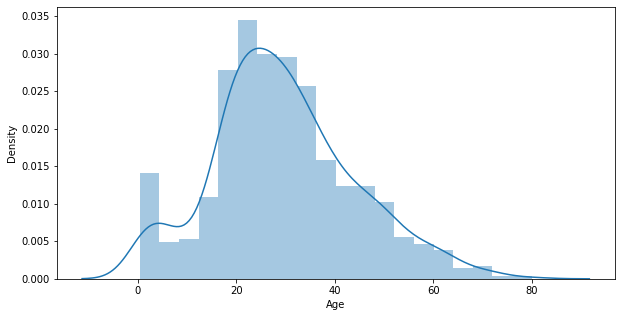

In [552]:
plt.figure(figsize = (10, 5))
sns.distplot(train_data['Age'])

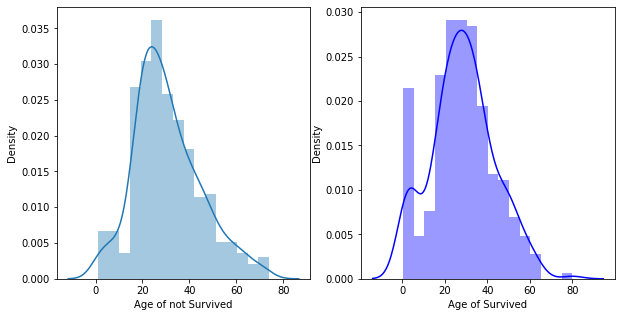

In [553]:
fig, (ax0, ax1) = plt.subplots(1, 2,  figsize=(10, 5))

sns.distplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax0, axlabel='Age of not Survived')
sns.distplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax1, color = 'Blue', axlabel='Age of Survived')

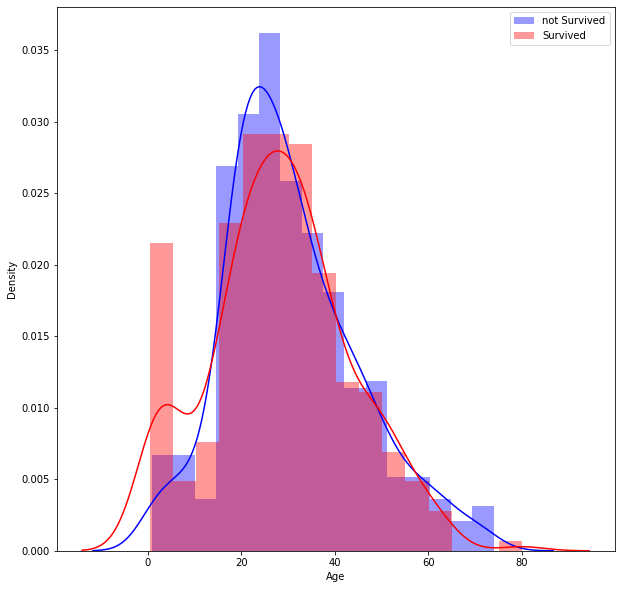

In [554]:
fig, ax0 = plt.subplots(1, figsize=(10, 10))

sns.distplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax0, color = 'Blue', label='not Survived')
sns.distplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax0, color = 'Red', label='Survived')

plt.legend()
plt.show()

In [555]:
#for dataset in [train_data, test_data]:
#    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))

In [556]:
test_data['Fare'] =  test_data['Fare'].fillna(np.median(test_data['Fare'].median()))

In [557]:
# mean = train_data["Age"].mean()
# std = train_data["Age"].std()
# is_null = train_data["Age"].isnull().sum()
# # compute random numbers between the mean, std
# rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# # fill NaN values in Age column with random values generated
# age_slice = train_data["Age"].copy()
# age_slice[np.isnan(age_slice)] = rand_age
# train_data["Age"] = age_slice
# train_data["Age"] = train_data["Age"].astype(int)
for dataset in [train_data, test_data]:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

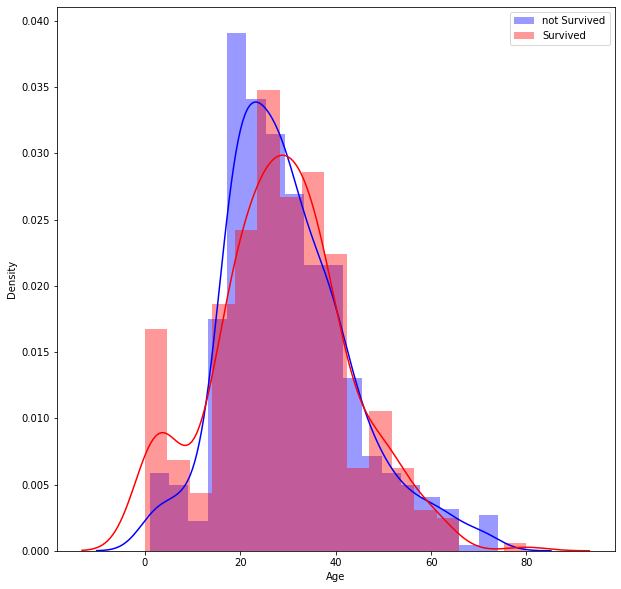

In [558]:
fig, ax0 = plt.subplots(1, figsize=(10, 10))

sns.distplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax0, color = 'Blue', label='not Survived')
sns.distplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax0, color = 'Red', label='Survived')

plt.legend()
plt.show()

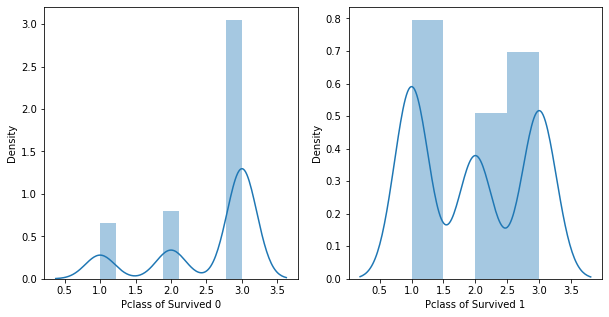

In [559]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for ax, j in zip(ax.flatten(), range(0, 2)):
    sns.distplot(train_data[train_data['Survived'] == j]['Pclass'].dropna(), ax=ax, axlabel='Pclass of Survived ' + str(j))

In [560]:
print('Размерность набора данных до удаления: {}'.format(train_data.shape))

train_data.drop(columns=['Ticket', 'Cabin'], inplace=True)
test_data.drop(columns=['Ticket', 'Cabin'], inplace=True)

print('Размерность набора данных после удаления: {}'.format(train_data.shape))

Размерность набора данных до удаления: (891, 12)
Размерность набора данных после удаления: (891, 10)


In [561]:
train_data['Name'].head(7)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
Name: Name, dtype: object

In [562]:
train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [563]:
train_data['title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [564]:
train_data['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Countess      1
Lady          1
Sir           1
Don           1
Ms            1
Capt          1
Name: title, dtype: int64

In [565]:
for dataset in [train_data, test_data]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col', 
                              'Don', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [566]:
train_data[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
5,Rare,0.500000
0,Dr,0.428571
3,Mr,0.156673
6,Rev,0.000000


In [567]:
for dataset in [train_data, test_data]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5, "Dr": 6, "Rev": 7}).fillna(0)

In [568]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,1


In [569]:
print('Размерность набора данных до удаления: {}'.format(train_data.shape))

for dataset in [train_data, test_data]:
    dataset.drop(columns=['Name'], inplace=True)
    
print('Размерность набора данных после удаления: {}'.format(train_data.shape))

Размерность набора данных до удаления: (891, 11)
Размерность набора данных после удаления: (891, 10)


In [570]:
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})

train_data.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22,1,0,7.2500,S,1
1,2,1,1,0,38,1,0,71.2833,C,3
2,3,1,3,0,26,0,0,7.9250,S,2
3,4,1,1,0,35,1,0,53.1000,S,3


In [571]:
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [572]:
train_data.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize
0,1,0,3,1,22,1,0,7.2500,S,1,2
1,2,1,1,0,38,1,0,71.2833,C,3,2
2,3,1,3,0,26,0,0,7.9250,S,2,1
3,4,1,1,0,35,1,0,53.1000,S,3,2


In [573]:
for dataset in [train_data, test_data]:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

In [574]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize,Alone
0,1,0,3,1,22,1,0,7.2500,S,1,2,0
1,2,1,1,0,38,1,0,71.2833,C,3,2,0
2,3,1,3,0,26,0,0,7.9250,S,2,1,1
3,4,1,1,0,35,1,0,53.1000,S,3,2,0
4,5,0,3,1,35,0,0,8.0500,S,1,1,1


In [575]:
train_data = train_data.drop(['Parch', 'SibSp'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp'], axis=1)

In [576]:
print('Размерность набора данных после удаления: {}'.format(train_data.shape))

Размерность набора данных после удаления: (891, 10)


In [577]:
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [578]:
for dataset in [train_data, test_data]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [579]:
for dataset in [train_data, test_data]:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')

In [580]:
train_data.head(6)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamilySize,Alone
0,1,0,3,1,22,7.2500,0,1,2,0
1,2,1,1,0,38,71.2833,1,3,2,0
2,3,1,3,0,26,7.9250,0,2,1,1
3,4,1,1,0,35,53.1000,0,3,2,0
4,5,0,3,1,35,8.0500,0,1,1,1
5,6,0,3,1,31,8.4583,2,1,1,1


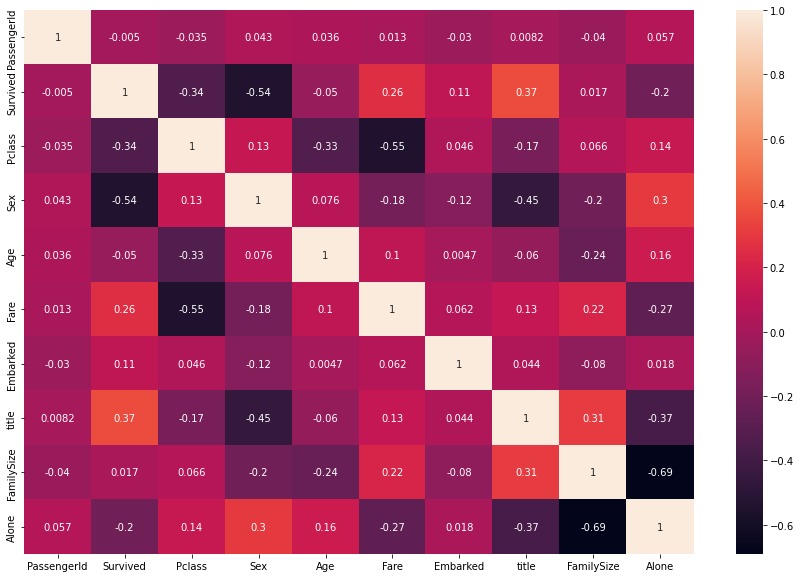

In [581]:
plt.figure(figsize = (15, 10))

sns.heatmap(train_data.corr(), annot=True)
plt.show()

# Модели


In [582]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [583]:
y = train_data['Survived']
X = train_data.drop(columns=['Survived'])
X_test = test_data

In [584]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [585]:
print('Тренировочная выборка:', X_train.shape)
print('Валидационная выборка:', X_val.shape)

Тренировочная выборка: (668, 9)
Валидационная выборка: (223, 9)


In [586]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_val)
accuracy_score(y_val, pred)

0.7937219730941704

In [587]:
from sklearn.tree import DecisionTreeClassifier

In [588]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_val)
accuracy_score(y_val, pred)

0.7937219730941704

In [589]:
from sklearn.ensemble import RandomForestClassifier

In [590]:
clf_tree = RandomForestClassifier(n_estimators=200, max_depth=7)
clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_val)
accuracy_score(y_val, pred)

0.8430493273542601

In [591]:
rnd_frst = RandomForestClassifier(n_estimators=200, max_depth=7)
rnd_frst.fit(X, y)

pred = rnd_frst.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [592]:
!kaggle competitions submit -c titanic -f submission.csv -m "RandomForestClassifier"

100% 2.77k/2.77k [00:02<00:00, 1.20kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster